<a href="https://colab.research.google.com/github/frankyehtw/hello-world/blob/master/%E3%80%8Cex03_learning_rate_selection_ipynb%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()      # 上傳檔案到 Colab
!ls

Saving pkgo_city66_class5_v1.csv to pkgo_city66_class5_v1.csv
pkgo_city66_class5_v1.csv  sample_data


In [ ]:
import numpy as np
my_data = np.genfromtxt('pkgo_city66_class5_v1.csv', delimiter=',',skip_header=1)
X_train = my_data[:,0:200]
X_train = X_train.astype('float32')

y_train = my_data[:,200]
y_train = y_train.astype('int')

''' Convert to one-hot encoding '''
import tensorflow
Y_train = tensorflow.keras.utils.to_categorical(y_train,5)


# Import keras to build a DL model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

# set the size of mini-batch and number of epochs
batch_size = 16
epochs = 50

### Step 1: 宣告一個 SGD optimizer 並且設定其 learning rate = 0.1, 再執行下方程式訓練 

In [ ]:
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad

sgd_large = SGD(lr = 0.1, momentum = 0.0, decay = 0.0, nesterov = False) 

In [ ]:
#  1. Model using large learning rate, for example: 0.1
model_large = Sequential()
model_large.add(Dense(128, input_dim=200))
model_large.add(Activation('sigmoid'))
model_large.add(Dense(256))
model_large.add(Activation('sigmoid'))
model_large.add(Dense(5))
model_large.add(Activation('softmax'))

model_large.compile(loss= 'categorical_crossentropy',
              optimizer=sgd_large,
              metrics=['accuracy'])

history_large = model_large.fit(X_train, Y_train,
                                batch_size=batch_size,
                                epochs=epochs,
                                verbose=0,
                                shuffle=True,
                                validation_split=0.1)

loss_large = history_large.history.get('loss')
acc_large = history_large.history.get('accuracy')

### Step 2: 同 Step 1 但將 learning rate 設定為 0.01, 再執行下方程式訓練 

In [ ]:
# set the learning rate of SGD optimizer to 0.01

sgd_median = SGD(lr = 0.01, momentum = 0.0, decay = 0.0, nesterov = False) 

In [ ]:
# print 'Building model using SGD(lr=0.01)'
''' 2. Model using median learning rate '''
model_median = Sequential()
model_median.add(Dense(128, input_dim=200))
model_median.add(Activation('sigmoid'))
model_median.add(Dense(256))
model_median.add(Activation('sigmoid'))
model_median.add(Dense(5))
model_median.add(Activation('softmax'))


model_median.compile(loss= 'categorical_crossentropy',
              optimizer=sgd_median ,
              metrics=['accuracy'])

history_median = model_median.fit(X_train, Y_train,
                                  batch_size=batch_size,
                                  epochs=epochs,
                                  verbose=0,
                                  shuffle=True,
                                  validation_split=0.1)

loss_median = history_median.history.get('loss')
acc_median = history_median.history.get('accuracy')

### Step 3: 同 Step 1 但將 learning rate 設定為 0.001, 再執行下方程式訓練 

In [ ]:
# set the learning rate of SGD optimizer to 0.001

sgd_small = SGD(lr = 0.001, momentum = 0.0, decay = 0.0, nesterov = False) 

In [ ]:
# print 'Building model using SGD(lr=0.001)'
''' 3. Model using small learning rate '''
model_small = Sequential()
model_small.add(Dense(128, input_dim=200))
model_small.add(Activation('sigmoid'))
model_small.add(Dense(256))
model_small.add(Activation('sigmoid'))
model_small.add(Dense(5))
model_small.add(Activation('softmax'))

model_small.compile(loss= 'categorical_crossentropy',
                    optimizer=sgd_small,
                    metrics=['accuracy'])

history_small = model_small.fit(X_train, Y_train,
                                batch_size=batch_size,
                                epochs=epochs,
                                verbose=0,
                                shuffle=True,
                                validation_split=0.1)

loss_small = history_small.history.get('loss')
acc_small = history_small.history.get('accuracy')

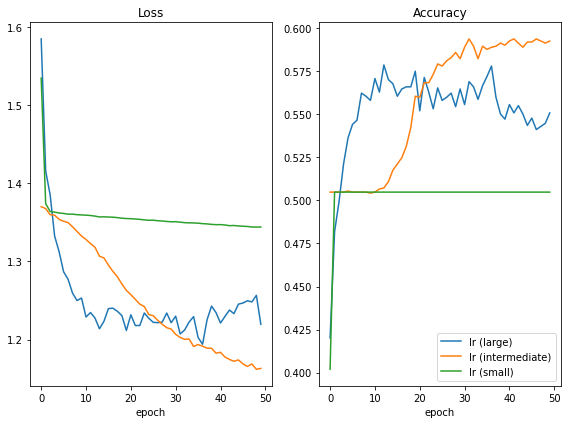

In [ ]:
import matplotlib.pyplot as plt
plt.figure(0,figsize=(8,6))
plt.subplot(121)
plt.plot(range(len(loss_large)), loss_large,label='lr (large)')
plt.plot(range(len(loss_median)), loss_median,label='lr (intermediate)')
plt.plot(range(len(loss_small)), loss_small,label='lr (small)')
plt.title('Loss')
plt.xlabel("epoch")
plt.subplot(122)
plt.plot(range(len(acc_large)), acc_large,label='lr (large)')
plt.plot(range(len(acc_median)), acc_median,label='lr (intermediate)')
plt.plot(range(len(acc_small)), acc_small,label='lr (small)')
plt.title('Accuracy')
plt.xlabel("epoch")
plt.legend(loc='lower right')
plt.tight_layout()
